In [34]:
# Import required libraries and load data from file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gross domestic product data
gdp = pd.read_csv('https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/total-healthcare-expenditure-gdp.csv')
gdp = gdp[(gdp['Year'] == 2021) & (gdp['Code'].notna())] 
# Life expectancy data
le = pd.read_csv('https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/life-expectancy-unwpp.csv')
le = le[(le['Year'] == 2021) & (le['Code'].notna())]
# Child mortality data
cm = pd.read_csv('https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/child-mortality-igme.csv')
cm = cm[(cm['Year'] == 2021) & (cm['Code'].notna())]

# Get Intersection 'Code' values and apply mask to the DataFrames
common = set(gdp['Code']).intersection(le['Code'], cm['Code'])
gdp = gdp[gdp['Code'].isin(common)].reset_index(drop=True)
le = le[le['Code'].isin(common)].reset_index(drop=True)
cm = cm[cm['Code'].isin(common)].reset_index(drop=True)

# Just in case, check for all DataFrames to be the same length
assert len(gdp) == len(le) == len(cm), "Datasets do not have the same length after filtering."

Para la representación gráfica en este punto del apartado, considero lo siguiente dado que el enunciado no es del todo preciso: se pide realizar los gráficos de PIB contra los otros dos DataFrames para analizar si existe una correlación entre ellas.

-> Correlation coefficient between GPD & Life expectation: 0.23701271424382864
-> Correlation coefficient between GPD & Child mortality: -0.25069294275708015


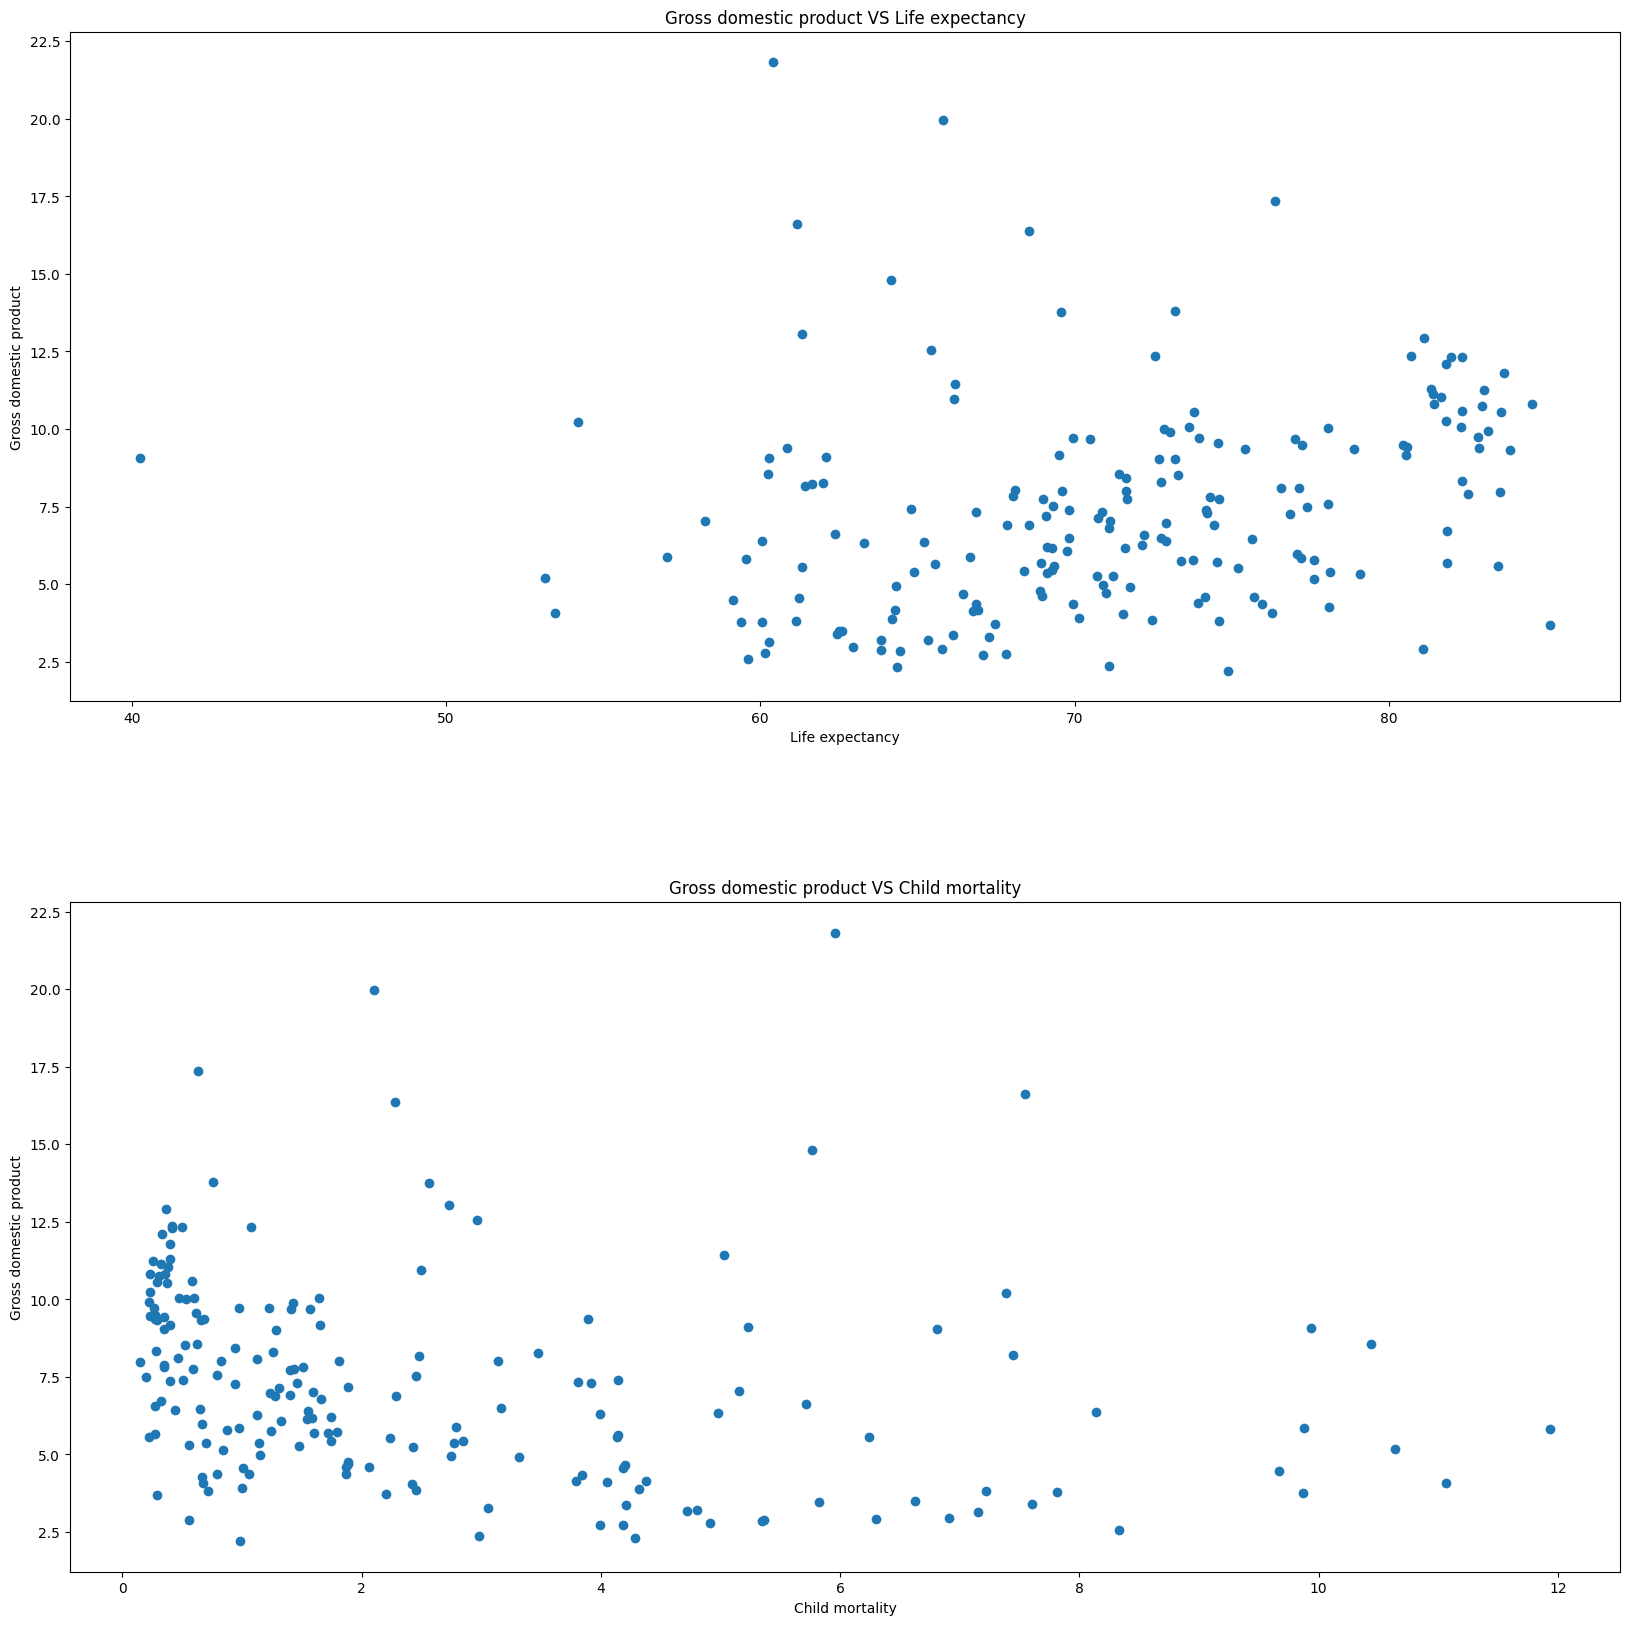

In [31]:
fig = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.3)
fig.set_figheight(20)

# Gross domestic product VS Life expectancy
gdp_vs_le = fig.add_subplot(2, 1, 1)
gdp_vs_le.set_title('Gross domestic product VS Life expectancy')
gdp_vs_le.set_xlabel('Life expectancy')
gdp_vs_le.set_ylabel('Gross domestic product')
gdp_vs_le.scatter(le['Life expectancy - Sex: all - Age: 0 - Variant: estimates'], gdp['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)'])
gdp_le_corr = le['Life expectancy - Sex: all - Age: 0 - Variant: estimates'].corr(gdp['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)'])
print(f'-> Correlation coefficient between GPD & Life expectation: {gdp_le_corr}')

# Gross domestic product VS Child mortality
gdp_vs_cm = fig.add_subplot(2, 1, 2)
gdp_vs_cm.set_title('Gross domestic product VS Child mortality')
gdp_vs_cm.set_xlabel('Child mortality')
gdp_vs_cm.set_ylabel('Gross domestic product')
gdp_vs_cm.scatter(cm['Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births'], gdp['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)'])
gdp_cm_corr = gdp_le_corr = cm['Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births'].corr(gdp['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)'])
print(f'-> Correlation coefficient between GPD & Child mortality: {gdp_cm_corr}')

plt.show()

Recordando un poco la definición del apartado anterior sobre qué significa el valor del coeficiente de correlación, podemos asumir lo siguiente:
- Existe una leve correlación entre el producto interno bruto (PIB o _GDP_ siendo las siglas en inglés) y la esperanza de vida. Esto indica que los paises con más recursos económicos tienden a tener una esperanza de vida mayor, pero no siendo éste el único factor ya que es una relación débil.
- Existe una leve correlación negativa entre el PIB y la mortalidad infantil, indicando que aquellos países con mayores ingresos tienden a tener un porcentaje de mortalidad infantil mucho menor. Remarco pero que se trata de una relación muy débil por lo que deben de existir más variables que afecten o sean relevantes.

In [39]:
# Load population data -> This will act as the weight for the average and correlation
population = pd.read_csv('https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/population-and-demography.csv')
population = population[(population['Year'] == 2021) & (population['Code'].notna())]
population = population[population['Code'].isin(common)].reset_index(drop=True)

# Again, just in case
assert len(gdp) == len(population), "Datasets do not have the same length after filtering."

# Just to make the next code pieces easier to read:
gdp_data_serie = gdp['Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)']
le_data_serie = le['Life expectancy - Sex: all - Age: 0 - Variant: estimates']
cm_data_serie = cm['Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births']
population_data_serie = population['Population - Sex: all - Age: all - Variant: estimates']


In [41]:
def weighted_corr(x, y, weight):
	# Weighted average/mean
	avg_x = np.average(x, weights=weight)
	avg_y = np.average(y, weights=weight)
	
	cov_xy = np.sum(weight * (x - avg_x) * (y - avg_y)) / np.sum(weight)
	var_x = np.sum(weight * (x - avg_x) ** 2) / np.sum(weight)
	var_y = np.sum(weight * (y - avg_y) ** 2) / np.sum(weight)

	return cov_xy / np.sqrt(var_x * var_y)

wcorr_gdp_le = weighted_corr(gdp_data_serie, le_data_serie, population_data_serie)
wcorr_gdp_cm = weighted_corr(gdp_data_serie, cm_data_serie, population_data_serie)

print(f'-> Weighted correlation coefficient between GDP & Life expectancy: {wcorr_gdp_le}')
print(f'-> Weighted correlation coefficient between GDP & Child mortality: {wcorr_gdp_cm}')

-> Weighted correlation coefficient between GDP & Life expectancy: 0.41000225954534836
-> Weighted correlation coefficient between GDP & Child mortality: -0.25906885339293506


En lo que se refiere al coeficiente ponderado entre el PIB y la esperanza de vida, sí que se puede notar una diferencia notable entre el valor anterior y el ponderado, reafirmando la conclusión anterior de que a mayor inversión en salud, la esperanza de vida aunmenta en el país.

Por el contrario, los valores del coeficiente de correlación y el de correlación ponderado para la mortalidad infantil no varían demasiado entre sí, indicando que, a pesar de ser una correlación negativa débil, la población no es un factor que tenga peso.